## IBM HR_Attrition_rate

In order to start with exercise,I have used IBM HR Analytics Employee Attrition Dataset,
which i had downloaded from https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics.
Here we have Attrition as target variable and rest of all features are input variables

For this task,I am importing numpy and pandas for data operations and calculations.Pyplot subpackages of Matplotlib and seaboen for visualization process and sklearn libraries various modules to mould the data compatible for machine learning.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [2]:
#accesing dataset from the file folder and putting the same to the dataframe
hr=pd.read_csv('C:/Users/hp/Downloads/DSData-master/HR-Employee-Attrition.csv')
attr=pd.DataFrame(hr)

#look of the structure of data
attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Checking for any null values in the dataset

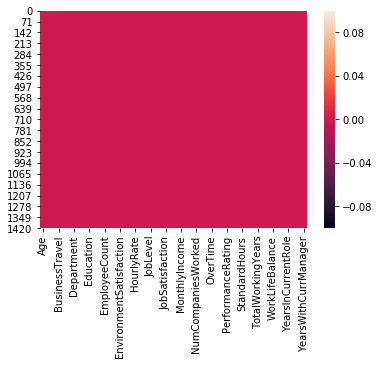

In [3]:
#checking for any null values using heatmap
sns.heatmap(attr.isnull())
#so it shows there is no null values in the dataset

In [4]:
attr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
#getting all info of the columns
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Getting the count of unique values of some columns

In [6]:
for value in attr.columns:
    print(attr[value].value_counts())

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     2

In [7]:
#dropping the columns have same value throughout the data or having no impact in attrition prediction
attr.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [8]:
attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
#lets see the shape of the data
attr.shape

(1470, 32)

Data Visualization

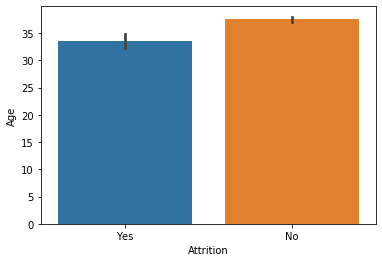

In [10]:
#plotting the barplot on attrition wrt to age
sns.barplot(x='Attrition',y='Age',data=attr)
#below graph shows that people who are staying has averge more

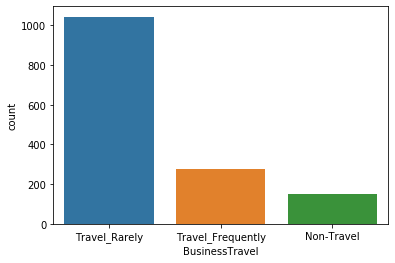

In [11]:
#lets take thecount for the bussiness travel
sns.countplot(x="BusinessTravel",data=attr)
#employee of label 2 has highest count

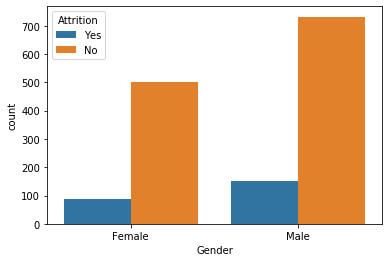

In [12]:
#lets chcek the attrition ratio based on gender
sns.countplot(x="Gender",hue="Attrition",data=attr)

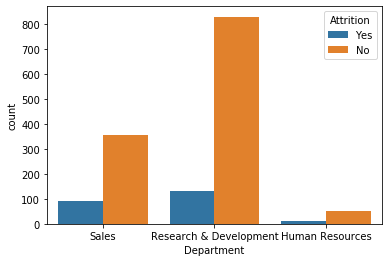

In [13]:
#checking the attrition of each jobrole
sns.countplot(x="Department",hue="Attrition",data=attr)

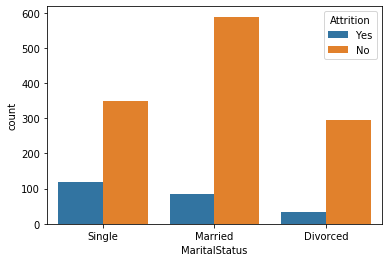

In [14]:
#lets get the count of marital status
sns.countplot(x="MaritalStatus",hue="Attrition",data=attr)

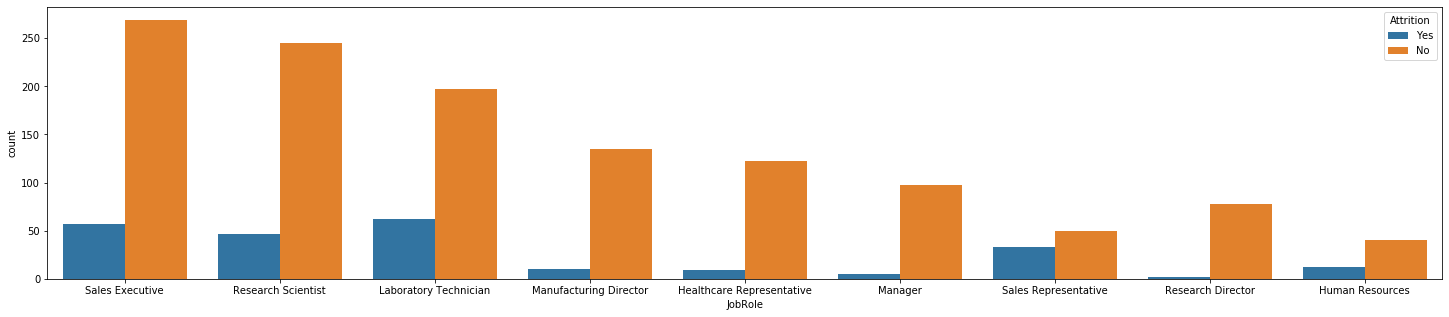

In [15]:
#Lets chcek the attrition in each job role
plt.figure(figsize=(25,5))
sns.countplot(x="JobRole",hue="Attrition",data=attr)

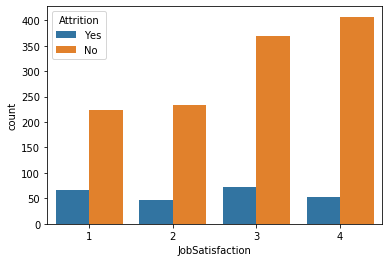

In [16]:
#lets chcek the attrition ratio based on job satisfaction
sns.countplot(x="JobSatisfaction",hue="Attrition",data=attr)
#the graph shows there is high attrition of not satisfied individuals

Checking for the object datatype columns

In [17]:
#Lets count the number of columns of object datatype
print(attr.dtypes.loc[attr.dtypes=="object"])

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object


Now,convert the categorical columns into the term of sorted labels using LabelEncoder from sklearn.preprocessing

In [18]:
#converting categorical columns into labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for val in list:
    attr[val]=le.fit_transform(attr[val].astype(str))

Applying zscore to remove outliers through the dataset

In [19]:
#applying zscore to the dataset
from scipy.stats import zscore
z=np.abs(zscore(attr))
attr_new=attr[(z<3).all(axis=1)]
attr_new.shape

(1387, 32)

In [20]:
#we see there is huge diffrence in data after applying zscore,so lets select the modified one
attr=attr_new

Statistical summary of data

In [21]:
attr.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,36.258111,0.165105,1.604182,806.054074,1.260995,9.176640,2.896179,2.256669,1026.304254,2.725306,...,3.152848,2.703677,0.795963,10.302091,2.803893,2.762797,6.104542,3.867340,1.775775,3.800288
std,8.838767,0.371409,0.667584,403.163183,0.526032,8.088602,1.023198,1.336205,602.623780,1.090541,...,0.359971,1.081529,0.856710,6.699832,1.291737,0.705043,4.679161,3.244441,2.499533,3.258874
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,467.500000,1.000000,2.000000,2.000000,1.000000,489.500000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,2.000000,807.000000,1.000000,7.000000,3.000000,2.000000,1022.000000,3.000000,...,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,0.000000,2.000000,1160.000000,2.000000,14.000000,4.000000,3.000000,1557.500000,4.000000,...,3.000000,4.000000,1.000000,13.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,1498.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,34.000000,6.000000,4.000000,25.000000,15.000000,11.000000,14.000000


Though i have applied zscore to this dataset earlier,there is very less columns having outliers.We need to overcome this using standard scalar during process of machine learning.
Also need to apply decomposition,as huge number of columns may varies the prediction

Correlation among all features with each other

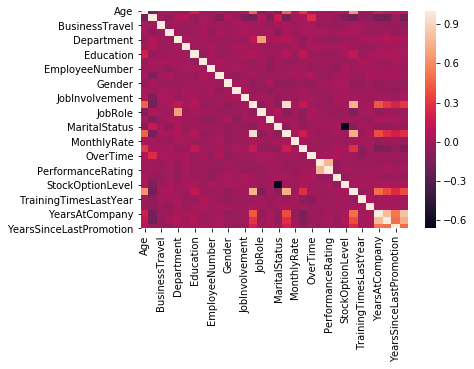

In [22]:
#getting correlation of data using heamap
attrc=attr.corr()
sns.heatmap(attrc)

Shaping the data for machine learning operations

In [23]:
#seperating input and target variables
var_x=attr.drop('Attrition',axis=1)
y=attr['Attrition']

In [24]:
#verifying for the skew in input data
var_x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [25]:
#adjusting for skewed values
for index in var_x.skew().index:
    if var_x.skew().loc[index]>0.55:
        var_x[index]=np.log1p(var_x[index])
    if var_x.skew().loc[index]<-0.55:
        var_x[index]=np.square(var_x[index])

To reduce the ambiguity duing prediction,we need to shrink the columns.So,I am going to import PCA for this decomposition

In [26]:
#Applying PCA to reduce columns having best correlated data
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
mod_x=pca.fit_transform(var_x)

In [27]:
#applying standardscaler to scale the data properly
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(mod_x)

In [28]:
#creating function for detrmining  best random state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        roc_score=roc_auc_score(y_test,pred)
        if roc_score > r_state:
            r_state=roc_score
            final_r=r_score
    print(r_state,'at',final_r)

In [29]:
#we need to suppress the warnings arises in detrmining random state
import warnings
warnings.filterwarnings('ignore')

In [30]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [31]:
#Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(alg)
    plt.show()
    #roc_auc_score evaluation
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_score=',roc_score)

In [32]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

Now we start for implying algorithms one by one

Logistic Regression

In [33]:
# lets start using linear_model first
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
random(lr)

0.5729757085020243 at 53


In [34]:
cross_val(lr)

[0.83453237 0.8381295  0.8381295  0.84837545 0.85144928]
mean_score= 0.8421232187064664
standard deviation 0.0065663734618255625


Decision Tree

In [35]:
#lets check for decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.6346100854229816 at 60


In [36]:
cross_val(dtc)

[0.68345324 0.71582734 0.76978417 0.73646209 0.78623188]
mean_score= 0.7383517452244452
standard deviation 0.03689246819289545


Naive_Bayes

In [37]:
#lets check for naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb)

0.5697850647561312 at 73


In [38]:
cross_val(gnb)

[0.83453237 0.8381295  0.83093525 0.85559567 0.83695652]
mean_score= 0.839229862382265
standard deviation 0.008545003605879004


K_neighbors

In [39]:
#implying k-neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters) 
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 11}

In [40]:
knn=KNeighborsClassifier(n_neighbors=21)
random(knn)

0.5073529411764706 at 92


In [41]:
cross_val(knn)

[0.83453237 0.8381295  0.8381295  0.83393502 0.83695652]
mean_score= 0.8363365813392294
standard deviation 0.0017796676622003737


Support Vector Machine

In [42]:
#lets check the score for support vector machine but determine the best kernel first
from sklearn.svm import SVC
svm=SVC()
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [43]:
svm=SVC(kernel='rbf',probability=True)
random(svm)

0.5234375 at 48


Ensemble Techniques:
    Random Forest Classifier
    
    Gradient Boosting Classifier

In [44]:
#now lets try for random forest technique
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rf,parameters)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 100}

In [45]:
rf=RandomForestClassifier(n_estimators=500)
random(rf)

0.5705034691336061 at 85


In [46]:
#lets try for gradient boosting algorithm
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gbc=GradientBoostingClassifier()
grid=GridSearchCV(gbc, parameters)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [47]:
gbc=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
random(gbc)

0.5990950226244344 at 80


we get the best roc_auc_score of 0.63 at the random state of 60 from decision tree classifier,so taking it as a final algorithm,
lets solve the metrics and other operations

In [52]:
dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=60)
model(dtc)

score= 1.0
0.7882096069868996
[[332  50]
 [ 47  29]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       382
           1       0.37      0.38      0.37        76

    accuracy                           0.79       458
   macro avg       0.62      0.63      0.62       458
weighted avg       0.79      0.79      0.79       458



In [53]:
cross_val(dtc)

[0.69784173 0.70143885 0.76978417 0.76534296 0.76086957]
mean_score= 0.7390554547415278
standard deviation 0.03232560250955486


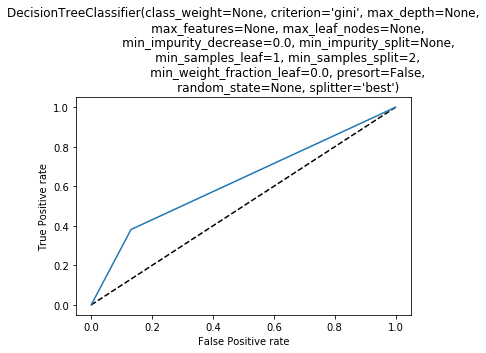

roc_score= 0.6253444475062


In [54]:
#roc curve for the algorithm using function declared above
roc(dtc)

In [55]:
#saving the model
from sklearn.externals import joblib
joblib.dump(dtc,'HR_attrition.pkl')

['HR_attrition.pkl']

## Conclusion

In this project,I have used "IBM_HR_aatrition_rate" dataset to predict the attrition rate wrt to other parameters in the dataset.After importing,I used various operations to get the insights of data and the datatype,after that i analysed it using plots and find out stats view also.
I applied the machine learning algorithms such as Logistic Regression,Decision Tree Classifier,Naive_bayes,K-neighbors,Support vector and ensemble techniques.I get the best roc_auc score from Decision Tree and considering it as a final algorithm.I solved for the metrics and roc_curve for that.